### Period finding

The file below demonstrates how to find period of a given function. For example the Unitary U, represents a periodic function which has a period of 4. 
The steps below implemented are as follows. 

- Use the unitary (U) as input into QPE circuit and calculate phase which will be equal to $ s/r $ s = state of the eigenvector and r being the period of the function 
- Find the phase using Fraction library; keep the largest r found. 
- Repeat unitary on the circuit for r times and verify if the circuit state returns to the same value. 

In [50]:
import pennylane as qml
import numpy as np
import matplotlib.pyplot as plt

In [51]:
import pennylane.transforms 

def U():
    qml.SWAP(wires=[2,3])
    qml.SWAP(wires=[1,2])
    qml.SWAP(wires=[0,1])
    for i in range(4):
        qml.PauliX(wires=i)

matrix = qml.matrix(U, wire_order=range(4))()

n_target_wires = 4
target_wires = range(n_target_wires)
n_estimation_wires = 3
estimation_wires = range(4, 4 + n_estimation_wires)


dev = qml.device("default.qubit", shots=1, wires=n_target_wires+n_estimation_wires)

@qml.qnode(dev)
def circuit(matrix):
    qml.PauliX(target_wires[-1])
    qml.QuantumPhaseEstimation(matrix, target_wires=target_wires, estimation_wires=estimation_wires)
    
    return qml.sample(wires=estimation_wires)

def get_phase(matrix):
    binary = "".join([str(b) for b in circuit(matrix)])
    return int(binary, 2) / 2 ** n_estimation_wires

for i in range(5):
    print(circuit(matrix), f"shot {i+1}, phase:",get_phase(matrix))


[0 1 0] shot 1, phase: 0.0
[1 1 0] shot 2, phase: 0.25
[0 1 0] shot 3, phase: 0.75
[1 0 0] shot 4, phase: 0.75
[0 0 0] shot 5, phase: 0.25


In [52]:
from fractions import Fraction

def U():
    qml.SWAP(wires=[2,3])
    qml.SWAP(wires=[1,2])
    qml.SWAP(wires=[0,1])
    for i in range(4):
        qml.PauliX(wires=i)

matrix = qml.matrix(U, wire_order=range(4))()

target_wires = range(4)
n_estimation_wires = 3
estimation_wires = range(4, 4 + n_estimation_wires)

def get_period(matrix):
    shots = 10
    r = float('-inf')
    
    for i in range(shots):
        ph = get_phase(matrix)
        r = max(r, Fraction(ph).denominator)
    return r

period = (get_period(matrix))
print ('Period of the matrix = ', period)


Period of the matrix =  4


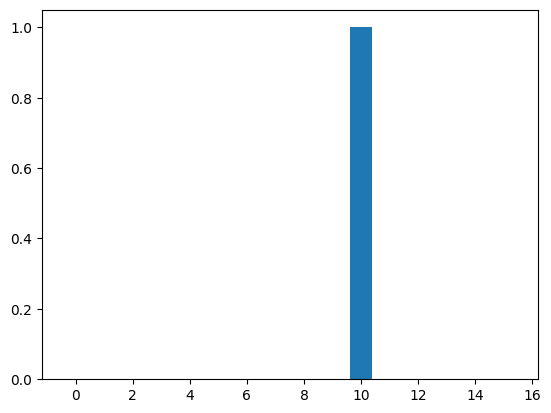

In [53]:
def U():
    qml.SWAP(wires=[2,3])
    qml.SWAP(wires=[1,2])
    qml.SWAP(wires=[0,1])

    for i in range(4):
        qml.PauliX(wires=i)

dev = qml.device("default.qubit", wires=4)

@qml.qnode(dev)
def circuit(state):
    qml.MottonenStatePreparation(state, wires=range(4))
    for i in range(period):
        qml.QubitUnitary(qml.matrix(U)(), wires=range(4))
    
    return qml.probs(wires=range(4))

state = [0 for _ in range(2**4)]
state[10] = 1

data = qml.QNode(circuit, dev)(state)
data = [np.real(i) for i in data]
plt.bar(range(2**4), data)
plt.show()
